In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/diabetes/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
split_count = int(df.shape[0]*0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [ ]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
features_name = df.columns[:-1].tolist()
features_name

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
label_name = train.columns[-1]
label_name

'Outcome'

In [ ]:
X_train = train[features_name]
print(X_train.shape)
X_train

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23
610,3,106,54,21,158,30.9,0.292,24
611,3,174,58,22,194,32.9,0.593,36
612,7,168,88,42,321,38.2,0.787,40


In [ ]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X_test = test[features_name]
print(X_test.shape)
X_test

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y_test = test[label_name]
print(y_test.shape)
y_test

(154,)


614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

[Text(191.3631012470309, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(64.42762767220903, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(12.723990498812352, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.361995249406176, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.180997624703088, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.542992874109263, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.361995249406176, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.723990498812352, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(19.085985748218526, 172.6729411764706, 'BMI <= 9.8\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(15.904988123515441, 1

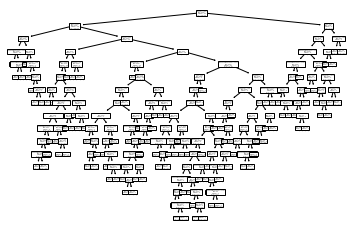

In [ ]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names = features_name)

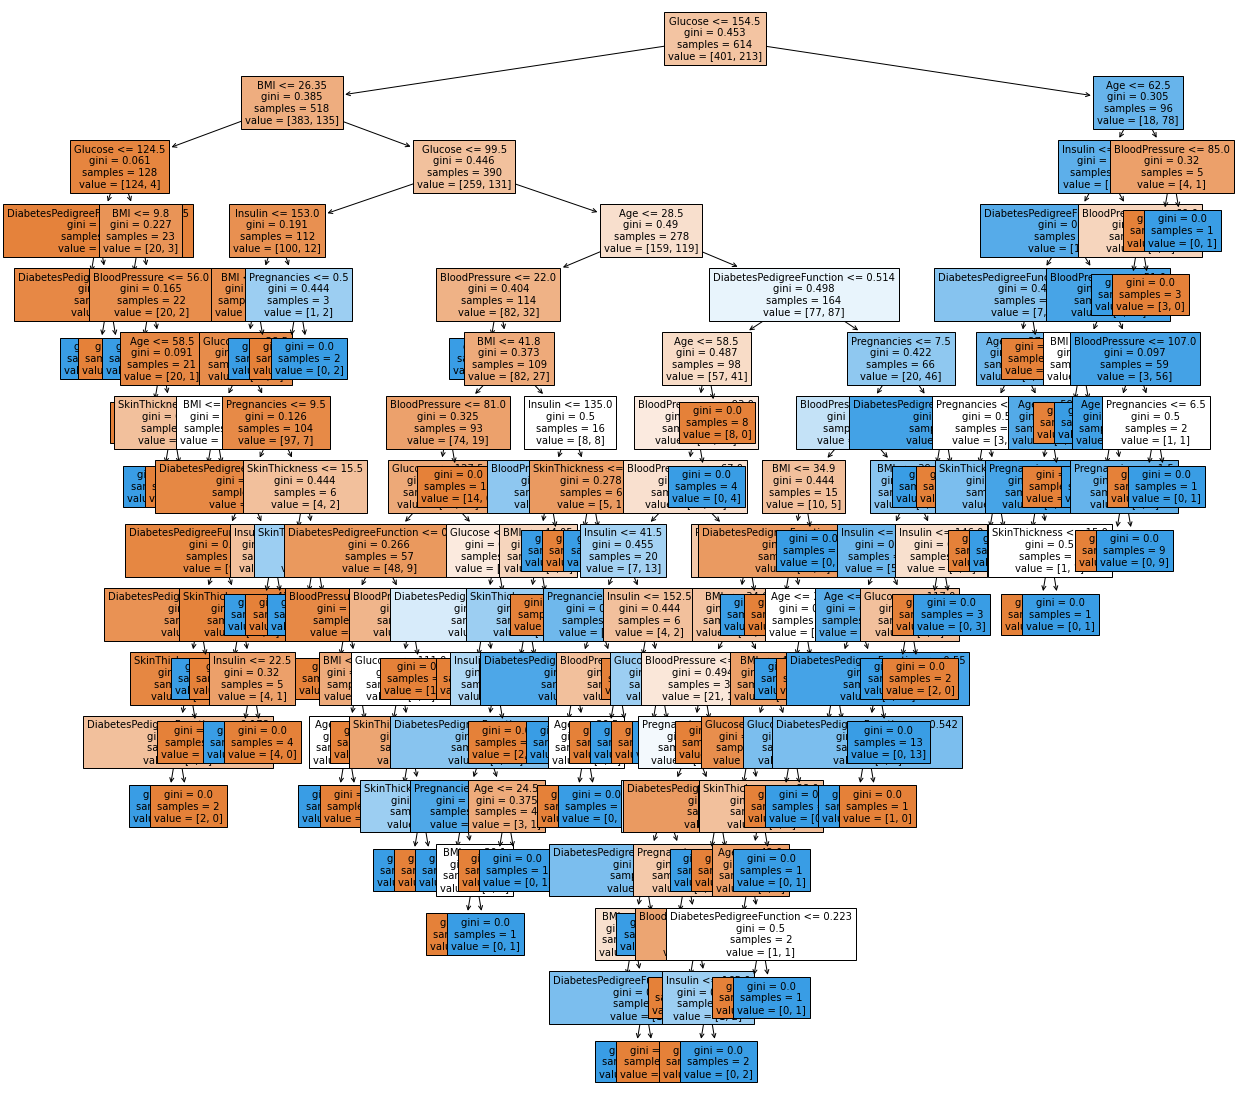

In [ ]:
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=features_name,
                filled = True,
                fontsize=10)

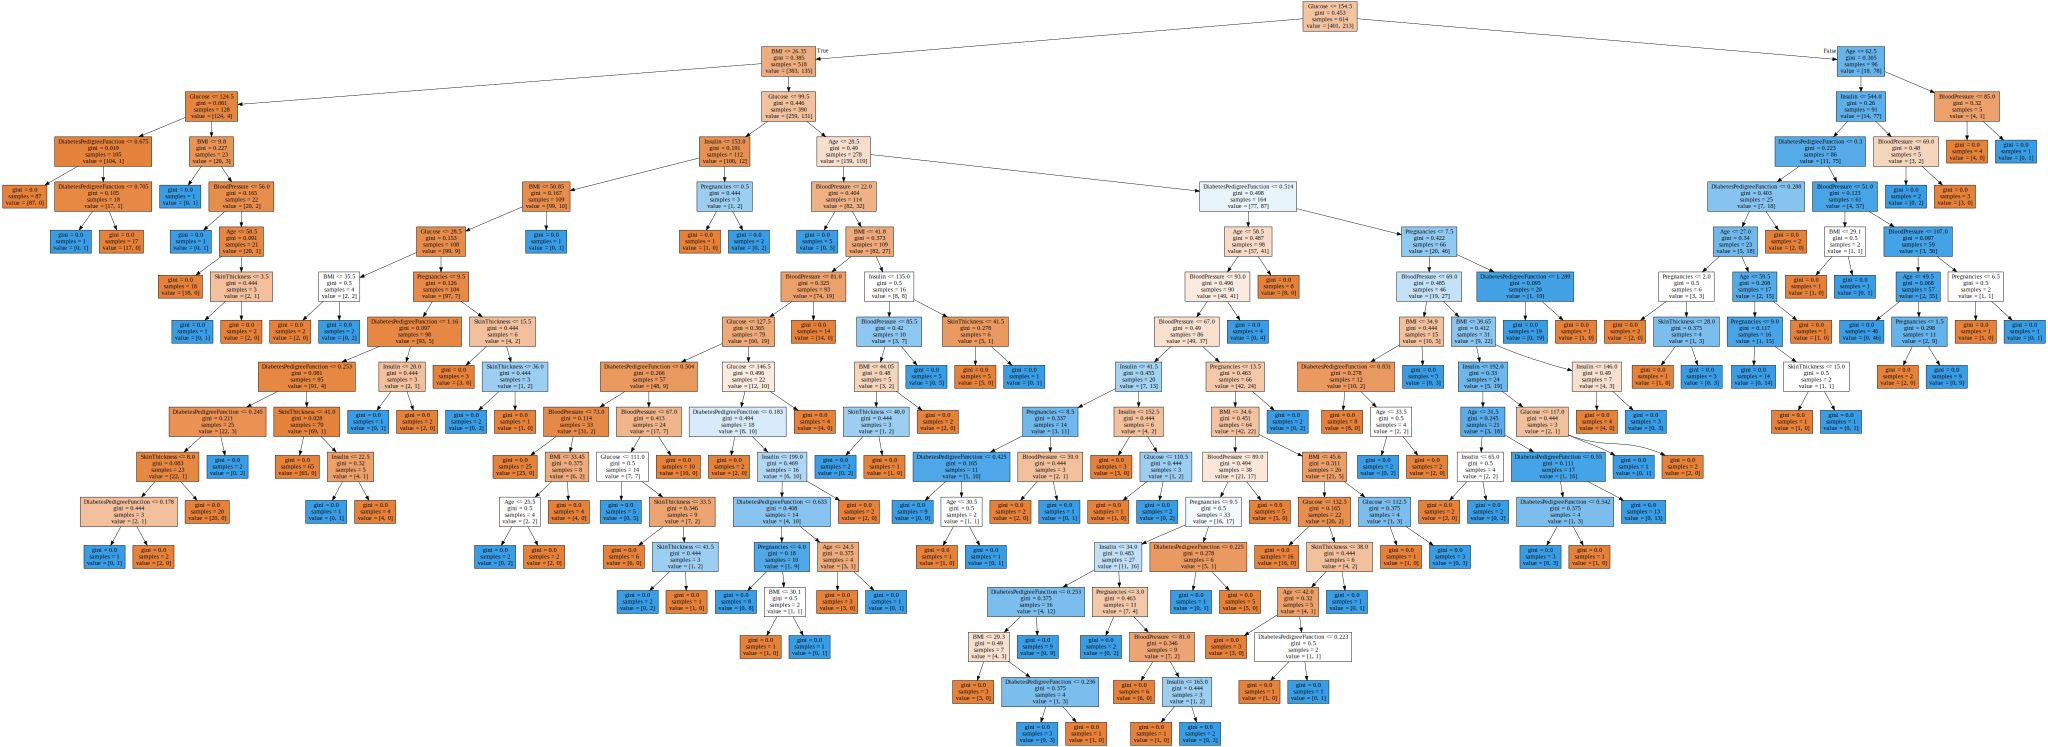

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,feature_names = features_name,
                           filled = True)
graphviz.Source(dot_tree)

In [ ]:
model.feature_importances_

array([0.07314725, 0.29333888, 0.11820524, 0.05258072, 0.08658538,
       0.14818756, 0.12778484, 0.10017014])

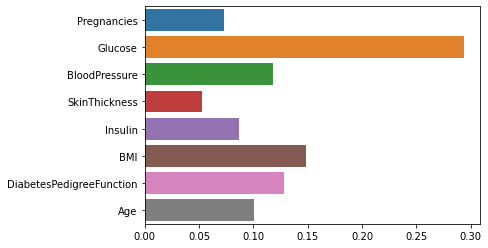

In [ ]:
sns.barplot(x=model.feature_importances_, y=features_name)

In [ ]:
diff_count = abs(y_test - y_predict).sum()
diff_count

40

In [ ]:
diff_count/len(y_test)

0.2597402597402597

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7402597402597403